In [1]:
import pandas as pd
import numpy as np
import re 
import csv
import os
import glob
import zipfile
import matplotlib.pyplot as plt

In [ ]:
#change current working directory to data directory
cd "C:\\Users\\anchi\\Downloads\\UKY\\Research\\ECGData\\12 Lead ECG Database\\ECGData"

In [ ]:
# get all the csv files 
folders = sorted(glob.glob('*.csv'))
folders

In [2]:
#read diagnostic features
diagnostic_features = pd.read_excel('C:\\Users\\anchi\\Downloads\\UKY\\Research\\ECGData\\12 Lead ECG Database\\Diagnostics.xlsx', engine = 'openpyxl')

In [3]:
diagnostic_features

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


In [4]:
#convert pandas to numpy array
diagnostic_features_ar = np.asarray(diagnostic_features)

In [5]:
diagnostic_features_ar

array([['MUSE_20180113_171327_27000', 'AFIB', 'RBBB TWC', ..., 208, 265,
        386],
       ['MUSE_20180112_073319_29000', 'SB', 'TWC', ..., 215, 261, 431],
       ['MUSE_20180111_165520_97000', 'SA', 'NONE', ..., 224, 265, 415],
       ...,
       ['MUSE_20181222_204310_31000', 'SVT', 'NONE', ..., 208, 284, 378],
       ['MUSE_20181222_204312_58000', 'SVT', 'NONE', ..., 205, 269, 360],
       ['MUSE_20181222_204314_78000', 'SVT', 'NONE', ..., 208, 278, 364]],
      dtype=object)

In [6]:
# set column 4 to 16 as input features
X = diagnostic_features_ar[:, 3:15]

In [7]:
X[:5]

array([[85, 'MALE', 117, 234, 114, 356, 496, 81, -27, 19, 208, 265],
       [59, 'FEMALE', 52, 52, 92, 432, 401, 76, 42, 8, 215, 261],
       [20, 'FEMALE', 67, 67, 82, 382, 403, 88, 20, 11, 224, 265],
       [66, 'MALE', 53, 53, 96, 456, 427, 34, 3, 9, 219, 267],
       [73, 'FEMALE', 162, 162, 114, 252, 413, 68, -40, 26, 228, 285]],
      dtype=object)

In [8]:
# set column 2(Rhythm) as labels
labels = diagnostic_features_ar[:, 1]

In [9]:
labels[:100]

array(['AFIB', 'SB', 'SA', 'SB', 'AF', 'SB', 'AFIB', 'SR', 'SB', 'SB',
       'SB', 'ST', 'SB', 'SB', 'SB', 'AFIB', 'SB', 'SB', 'SB', 'SB', 'SR',
       'SB', 'AFIB', 'ST', 'SB', 'SB', 'SB', 'SA', 'AF', 'AFIB', 'SB',
       'ST', 'SB', 'AFIB', 'SA', 'AFIB', 'SB', 'AFIB', 'SB', 'AFIB', 'ST',
       'SR', 'AFIB', 'SB', 'ST', 'AFIB', 'SR', 'AFIB', 'SB', 'AFIB', 'SR',
       'AF', 'SB', 'SB', 'SB', 'SB', 'ST', 'SR', 'ST', 'AFIB', 'SR', 'SB',
       'SR', 'AFIB', 'SB', 'SB', 'AFIB', 'SR', 'AF', 'SR', 'AFIB', 'SR',
       'SB', 'AFIB', 'SB', 'SR', 'SB', 'AFIB', 'SB', 'AFIB', 'AF', 'SB',
       'SB', 'SB', 'AFIB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'AFIB',
       'SB', 'ST', 'SB', 'ST', 'SR', 'SA', 'SB', 'SB'], dtype=object)

In [11]:
# get names and count of unique labels(Rhythm)
u, c = np.unique(labels, return_counts=True)
print(u)
print(c)

['AF' 'AFIB' 'AT' 'AVNRT' 'AVRT' 'SA' 'SAAWR' 'SB' 'SR' 'ST' 'SVT']
[ 445 1780  121   16    8  399    7 3889 1826 1568  587]


In [11]:
c[7]/np.sum(c)

0.36530152169829044

[1780. 3889.  399.  445. 1826. 1568.  587.  121.   16.    7.    8.]


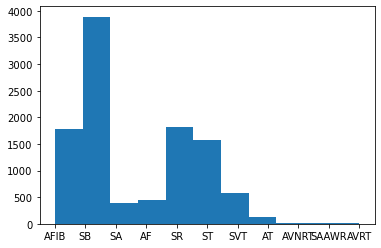

In [16]:
#histogram of labels
print(plt.hist(labels, 11)[0])

In [12]:
# encode age to one hot 0 ,1 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])

In [13]:
# encode labels in mumeric form
y = label_encoder.fit_transform(labels)

(array([ 183.,  251.,  580.,  675., 1269., 2110., 2360., 1863., 1119.,
         236.]),
 array([4.0, 13.4, 22.8, 32.2, 41.6, 51.0, 60.400000000000006, 69.8, 79.2,
        88.60000000000001, 98.0], dtype=object),
 <BarContainer object of 10 artists>)

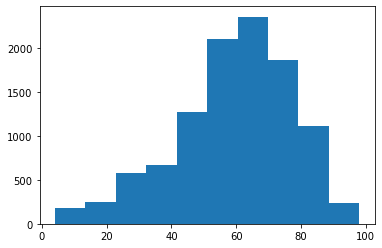

In [19]:
# histogram of ages 
import matplotlib.pyplot as plt
plt.hist(X[:,0])

(array([1780., 3889.,  399.,  445., 1826., 1568.,  587.,  121.,   16.,
           7.,    8.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

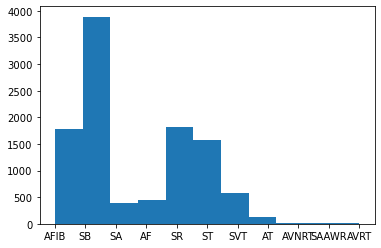

In [20]:
import matplotlib.pyplot as plt
plt.hist(labels, 11)

In [ ]:
X[1, 0]

In [70]:
# convert age values to age range(0, 1, 2)
for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0 
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

(array([4057.,    0.,    0.,    0.,    0., 3607.,    0.,    0.,    0.,
        2982.]),
 array([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002,
        1.4000000000000001, 1.6, 1.8, 2.0], dtype=object),
 <BarContainer object of 10 artists>)

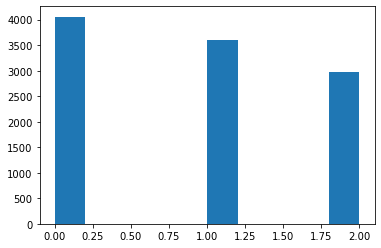

In [71]:
#histogram of age range
import matplotlib.pyplot as plt
plt.hist(X[:,0])

In [24]:
labels

array(['AFIB', 'SB', 'SA', ..., 'SVT', 'SVT', 'SVT'], dtype=object)

In [25]:
y

array([ 1,  7,  5, ..., 10, 10, 10])

In [14]:
u, c = np.unique(y, return_counts=True)
print(u)
print(c)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 445 1780  121   16    8  399    7 3889 1826 1568  587]


In [29]:
X.shape

(10646, 12)

In [35]:
y.shape

(10646,)

In [38]:
# convert 7 labels to two values(0,1)
for i in range(y.shape[0]):
    if y[i] != 7:
        y[i] = 0
    else:
        y[i] = 1
        
    

In [16]:
# group labels into 4 classes
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3

In [17]:
# get unique labels and count after grouping into classes
u, c = np.unique(y, return_counts=True)
print(u)
print(c)

[0 1 2 3]
[2225 2307 2225 3889]


In [45]:
X

array([[85, 1, 117, ..., 19, 208, 265],
       [59, 0, 52, ..., 8, 215, 261],
       [20, 0, 67, ..., 11, 224, 265],
       ...,
       [39, 1, 152, ..., 25, 208, 284],
       [76, 1, 175, ..., 29, 205, 269],
       [75, 1, 117, ..., 19, 208, 278]], dtype=object)

In [37]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
# define dataset

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#model = LogisticRegression()

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)
y = labels

# setting age regrouping for best distribution
for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0 
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2

# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3
        
        


norm1 = MinMaxScaler()
norm2 = StandardScaler()


#for i in range(2, X.shape[1]):
   # X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()
    
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

Mean accuracy: 0.806 (0.008)
[[ 271  214  162   31]
 [  95  579    9    2]
 [  74   18  525   36]
 [   2    1    5 1170]]
              precision    recall  f1-score   support

           0      0.613     0.400     0.484       678
           1      0.713     0.845     0.774       685
           2      0.749     0.804     0.775       653
           3      0.944     0.993     0.968      1178

    accuracy                          0.797      3194
   macro avg      0.755     0.761     0.750      3194
weighted avg      0.784     0.797     0.784      3194



C:\Users\anchi\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
n_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [36]:
# evaluate random forest classifier model
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the multinomial logistic regression model
model = RandomForestClassifier(max_depth=100, random_state=0)

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

norm1 = MinMaxScaler()
norm2 = StandardScaler()

y = labels

for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0 
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2
        
# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3
        



#for i in range(2, X.shape[1]):
    #X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()
    


# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))

Mean accuracy: 0.914 (0.005)
[[ 487   91   53   14]
 [  57  638    5    2]
 [  40    2  645    5]
 [   5    0    2 1148]]
              precision    recall  f1-score   support

           0      0.827     0.755     0.789       645
           1      0.873     0.909     0.890       702
           2      0.915     0.932     0.923       692
           3      0.982     0.994     0.988      1155

    accuracy                          0.914      3194
   macro avg      0.899     0.897     0.898      3194
weighted avg      0.912     0.914     0.912      3194



In [25]:
n_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [ ]:
n_scores

In [23]:
# evaluate svm classifier model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the multinomial logistic regression model
model = svm.SVC()

#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
#poly = svm.SVC(kernel='poly', degree=3, C=1)

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

norm1 = MinMaxScaler()
norm2 = StandardScaler()


y = labels

for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0 
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2
        
# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3


#for i in range(2, X.shape[1]):
   # X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
   # X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()
    
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#n_scores = cross_val_score(poly, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
#print('Mean Accuracy rbf: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)
clf = model.fit(trainX, trainy)

predict = model.predict(testX)

conf_mat = confusion_matrix(testy, predict)

print(conf_mat)

print(metrics.classification_report(testy, predict, digits=3))



Mean Accuracy : 0.829 (0.005)
[[ 309  203  129   37]
 [  42  631    9    3]
 [  20   44  518   71]
 [   1    1    2 1174]]
              precision    recall  f1-score   support

           0      0.831     0.456     0.589       678
           1      0.718     0.921     0.807       685
           2      0.787     0.793     0.790       653
           3      0.914     0.997     0.953      1178

    accuracy                          0.824      3194
   macro avg      0.812     0.792     0.785      3194
weighted avg      0.828     0.824     0.811      3194



In [40]:
# XGBoost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

norm1 = MinMaxScaler()
norm2 = StandardScaler()


y = labels

for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0 
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2
        
# change 11 labels to 4 labels for multiple classification based on grouping system
for i in range(y.shape[0]):
    if y[i] in (0,1):
        y[i] = 0
    elif y[i] in (2,3,4,6,9,10):
        y[i] = 1
    elif y[i] in (5,8):
        y[i] = 2
    else:
        y[i] = 3

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

conf_mat = confusion_matrix(y_test, predictions)

print(conf_mat)

print(metrics.classification_report(y_test, predictions, digits=3))

C:\Users\anchi\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.20%
[[ 568  101   52   18]
 [  55  682    8    2]
 [  16    2  702    9]
 [   7    0    4 1288]]
              precision    recall  f1-score   support

           0      0.879     0.769     0.820       739
           1      0.869     0.913     0.890       747
           2      0.916     0.963     0.939       729
           3      0.978     0.992     0.985      1299

    accuracy                          0.922      3514
   macro avg      0.911     0.909     0.909      3514
weighted avg      0.921     0.922     0.921      3514



In [53]:
#20 random test split

from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

#cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#w = {0:1, 1: 1}
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]
labels = diagnostic_features_ar[:, 1]

label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])
labels = label_encoder.fit_transform(labels)

y = labels


for i in range(X[:, 0].shape[0]):
    if X[i, 0] <= 55:
        X[i, 0] = 0 
    elif X[i, 0] > 55 and X[i, 0] <=70:
        X[i,0] = 1
    else:
        X[i,0] = 2
        
for i in range(y.shape[0]):
    if y[i] != 7:
        y[i] = 0
    else:
        y[i] = 1

#X[:,0] = np.sqrt(X[:,0])

norm1 = MinMaxScaler()
norm2 = StandardScaler()



#for i in range(2, X.shape[1]):
#    X[:,i] = norm2.fit_transform(X[:, i].reshape(-1,1)).squeeze()
#    X[:,i] = norm1.fit_transform(X[:, i].reshape(-1,1)).squeeze()
    
# evaluate model
#############


#cv = KFold(n_splits=10, random_state=1, shuffle=True)
RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score),
      'recall' : make_scorer(recall_score), 
       'f1_score' : make_scorer(f1_score)}

scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

#report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy'])))
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision']), std(scores['test_precision'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall']), std(scores['test_recall'])))
print('F1_Score: %.3f (%.3f)' % (mean(scores['test_f1_score']), std(scores['test_f1_score'])))



  
#penalty = ['l1', 'l2', 'elasticnet']
#C = [0.5, 0.6, 0.7, 0.8]
#class_weight = [{1:5, 0:1}, {1:6, 0:1}, {1:4, 0:1}, {1:3, 0:1}, {1:1, 0:1}]
#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#max_iter = [100, 500, 1000]

#param_grid = dict(penalty=penalty, C=C, solver=solver, max_iter=max_iter)

#lr_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring= make_scorer(roc_auc_score),
#                   verbose=1, n_jobs=-1, cv=10)
#lr_cv.fit(X, y)
#best_params = lr_cv.best_params_
#print(f"Best parameters: {best_params}")

#model = LogisticRegression(max_iter = 1000)

#auc_l =[]
#f1_l = []

#for i in range(20):
#    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=i)

    #ns_probs = [0 for _ in range(testy.shape[0])]

#    clf = model.fit(trainX, trainy)

#    predict = model.predict(testX)

#    conf_mat = confusion_matrix(testy, predict)

#    print(conf_mat)


##

#model2 = RandomForestClassifier(max_depth=2, random_state=0)

#clf2 = model2.fit(trainX, trainy)

#predict = model2.predict(testX)

#conf_mat2 = confusion_matrix(testy, predict)

#print(conf_mat2)

## 
#model3 = svm.SVC()

#clf3 = model3.fit(trainX, trainy)

#predict = model3.predict(testX)

#conf_mat3 = confusion_matrix(testy, predict)

#print(conf_mat3)

# ROC curve

 

Accuracy: 0.977 (0.003)
Precision: 0.945 (0.007)
Recall: 0.995 (0.002)
F1_Score: 0.969 (0.004)


# Correlation between features

In [54]:
import scipy

In [55]:
diagnostic_features_ar = np.asarray(diagnostic_features)
X = diagnostic_features_ar[:, 3:15]

In [57]:
label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])

In [60]:
X.shape

(10646, 12)

In [62]:
scipy.stats.pearsonr(X[:, 2], X[:, 3])[1]

0.0

In [67]:
for i in range(2, 12):
    for j in range(i+1, 12):
        print("Pearson correlation of feature" + str(i) + " and feature" + str(j) + " = " + str(scipy.stats.pearsonr(X[:, i], X[:, j])[0]) + " p_value = " + str(scipy.stats.pearsonr(X[:, i], X[:, j])[1]))
                

Pearson correlation of feature2 and feature3 = 0.5333395351012189 p_value = 0.0
Pearson correlation of feature2 and feature4 = -0.05484732397315045 p_value = 1.4899653524485962e-08
Pearson correlation of feature2 and feature5 = -0.8531689575613922 p_value = 0.0
Pearson correlation of feature2 and feature6 = 0.42167227568847754 p_value = 0.0
Pearson correlation of feature2 and feature7 = 0.09143699575141209 p_value = 3.2888203225882616e-21
Pearson correlation of feature2 and feature8 = 0.10420074602696262 p_value = 4.3036976514177455e-27
Pearson correlation of feature2 and feature9 = 0.9970715121893723 p_value = 0.0
Pearson correlation of feature2 and feature10 = 0.011265529999519183 p_value = 0.24512514245787637
Pearson correlation of feature2 and feature11 = -0.048688169493821626 p_value = 5.007908277639086e-07
Pearson correlation of feature3 and feature4 = -0.06014813823770229 p_value = 5.26662727621062e-10
Pearson correlation of feature3 and feature5 = -0.4740838095432183 p_value = 

# Signal Processing Features

In [ ]:
folders = sorted(glob.glob('*.csv'))
folders

In [ ]:
folders[0]

In [ ]:
f = pd.read_csv(folders[0])

In [ ]:
f_arr = np.asarray(f)

In [ ]:
f_arr[:,0].shape

In [ ]:
plt.plot(np.arange(5000), f_arr[:,0])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,1])
    
    

In [ ]:
plt.plot(np.arange(5000), f_arr[:,2])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,3])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,4])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,5])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,6])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,7])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,8])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,9])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,10])

In [ ]:
plt.plot(np.arange(5000), f_arr[:,11])